In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio
from scipy import fft
import librosa
import librosa.display
from wavinfo import WavInfoReader
import pandas as pd

In [20]:
df_drummers = pd.read_csv('../data/info.csv')

In [21]:
df_drummers.beat_type.unique()

array(['beat', 'fill'], dtype=object)

In [25]:
df_drummers = df_drummers.drop(columns=['beat_type', 'session', 'split', 'midi_filename'])
df_drummers.sample(10)

,drummer,id,style,bpm,time_signature,audio_filename,duration
148,drummer1,drummer1/session1/223,rock/halftime,140,4-4,drummer1/session1/223_rock-halftime_140_fill_4...,1.390177
135,drummer1,drummer1/session1/211,rock/halftime,140,4-4,drummer1/session1/211_rock-halftime_140_fill_4...,1.378570
430,drummer1,drummer1/session2/58,punk,128,4-4,drummer1/session2/58_punk_128_fill_4-4.wav,1.728516
223,drummer1,drummer1/session1/5,jazz/funk,116,4-4,drummer1/session1/5_jazz-funk_116_beat_4-4.wav,152.673379
688,drummer7,drummer7/eval_session/6,hiphop/groove6,87,4-4,drummer7/eval_session/6_hiphop-groove6_87_beat...,43.837633
84,drummer1,drummer1/session1/166,latin/brazilian-baiao,95,4-4,drummer1/session1/166_latin-brazilian-baiao_95...,2.399996
280,drummer1,drummer1/session2/100,funk/rock,92,4-4,drummer1/session2/100_funk-rock_92_fill_4-4.wav,2.523098
536,drummer3,drummer3/session1/37,rock,120,4-4,drummer3/session1/37_rock_120_beat_4-4.wav,1.676042
706,drummer7,drummer7/session1/22,hiphop,100,4-4,drummer7/session1/22_hiphop_100_beat_4-4.wav,20.013750
145,drummer1,drummer1/session1/220,rock/halftime,140,4-4,drummer1/session1/220_rock-halftime_140_fill_4...,3.041961


In [26]:
drumbeat = df_drummers.loc[1020, 'audio_filename']
drumbeat

In [28]:
wavFile = 'data/' + drumbeat

In [29]:
df_drummers['style'].unique()

array(['funk/groove1', 'soul/groove10', 'funk/groove2', 'soul/groove3',
       'soul/groove4', 'funk/groove5', 'hiphop/groove6', 'pop/groove7',
       'rock/groove8', 'soul/groove9', 'funk', 'jazz/funk',
       'neworleans/secondline', 'dance/disco', 'funk/fast',
       'latin/brazilian-baiao', 'afrocuban', 'reggae', 'reggae/slow',
       'rock/halftime', 'funk/purdieshuffle', 'latin/samba', 'jazz',
       'rock/shuffle', 'jazz/mediumfast', 'jazz/fast', 'latin/reggaeton',
       'dance/breakbeat', 'neworleans/funk', 'latin/chacarera', 'country',
       'funk/rock', 'rock/prog', 'afrocuban/bembe', 'gospel',
       'afrocuban/rhumba', 'rock', 'punk', 'jazz/march', 'rock/folk',
       'afrobeat', 'latin/bomba', 'afrocuban/calypso', 'jazz/swing',
       'rock/rockabilly', 'jazz/linear', 'hiphop', 'jazz/klezmer',
       'latin/brazilian', 'blues/shuffle', 'latin/merengue',
       'latin/brazilian-bossa', 'latin/brazilian-sambareggae',
       'latin/brazilian-songo', 'middleeastern', 'latin/

In [15]:
info = WavInfoReader(wavFile)

In [16]:
info

WavInfoReader(%s, %s, %s)

In [17]:
y, sr = librosa.load(wavFile)

In [18]:
sr

22050

In [20]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [21]:
beat_frames

array([  3,  20,  38,  56,  73,  92, 111])

In [22]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [23]:
beat_times

array([0.06965986, 0.46439909, 0.88235828, 1.30031746, 1.69505669,
       2.13623583, 2.57741497])

In [24]:
Audio(wavFile)

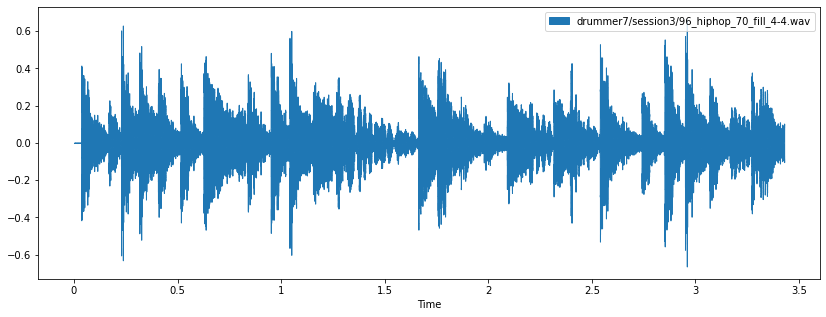

In [25]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, label=drumbeat)
plt.legend()
plt.savefig('waveform.png')

In [26]:
scipy_sample_rate, scipy_audio = wavfile.read(wavFile)


/var/folders/jw/d43bpk916bz864ddr7_d7nqh0000gp/T/ipykernel_97469/1519479978.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  scipy_sample_rate, scipy_audio = wavfile.read(wavFile)


In [27]:
print(f"Original sample rate: {scipy_sample_rate}")
print(f"Librosa sample rate: {sr}")

Original sample rate: 44100
Librosa sample rate: 22050


In [28]:
print(f'Original audio file min~max range: {np.min(scipy_audio)} to {np.max(scipy_audio)}')
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(y), np.max(y)))

Original audio file min~max range: -21776 to 18636
Librosa audio file min~max range: -0.66 to -0.66


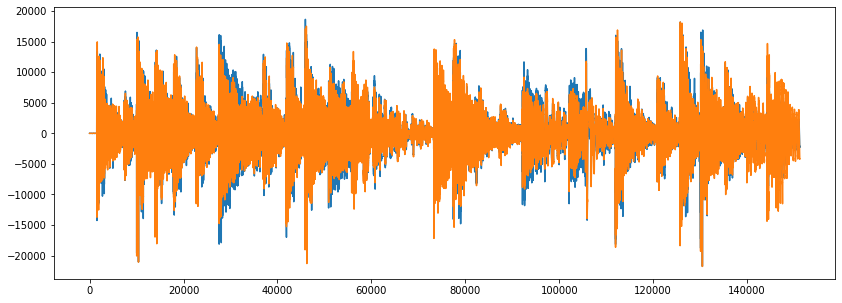

In [29]:
plt.figure(figsize=(14, 5))
plt.plot(scipy_audio)

In [30]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

In [31]:
mfccs.shape

(40, 148)

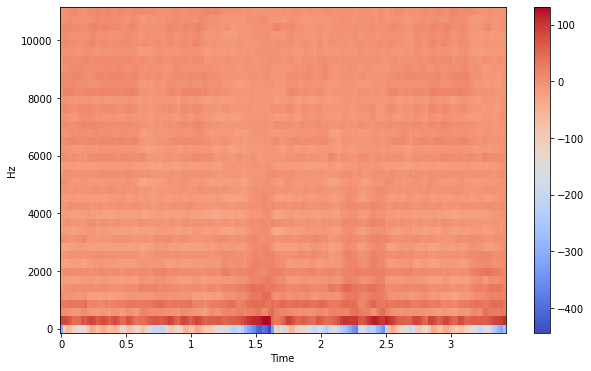

In [32]:
plt.figure(figsize=(10,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [33]:
n_fft = 2048
hop_length = 512

In [34]:
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
D.shape

(1025, 148)

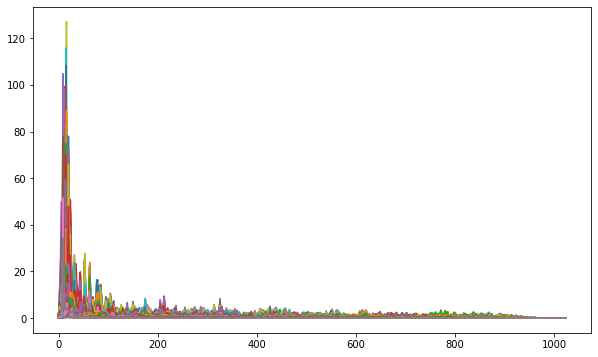

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(D);

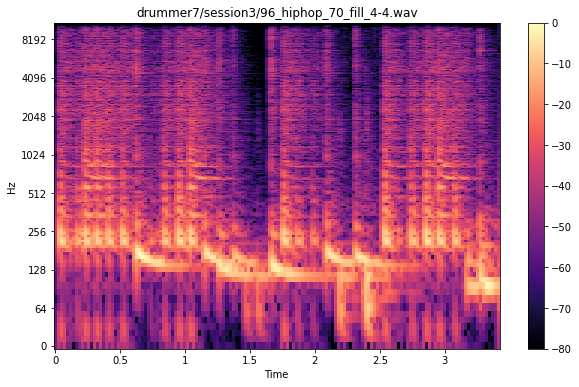

In [36]:
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(10,6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title(drumbeat)
plt.colorbar()
plt.savefig('spectrogram.png')

/var/folders/jw/d43bpk916bz864ddr7_d7nqh0000gp/T/ipykernel_33242/2624918385.py:1: FutureWarning: Pass y=[-0.0001658  -0.00026118 -0.00024087 ... -0.09626859 -0.09586104
 -0.10297781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)


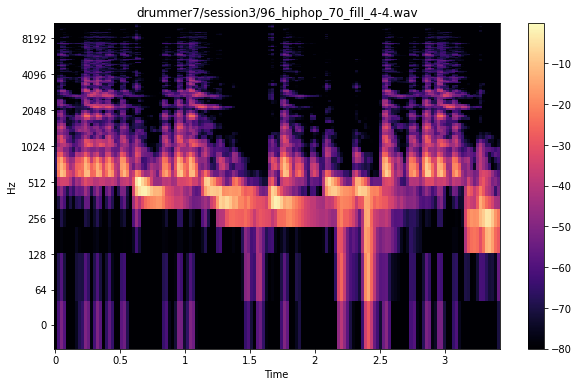

In [60]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10,6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title(drumbeat)
plt.colorbar()